In [1]:
import pandas as pd
import matplotlib
import theano
import copy
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader
from neupy import algorithms, layers, init, environment, plots
from neupy.exceptions import StopTraining
#theano.config.floatX = 'float32'

In [2]:
environment.reproducible() 
#environment.speedup()
learn_data=pd.read_csv("../learn_data.csv", index_col=0)
#learn_data=pd.DataFrame(learn_data, dtype='float32')
learn_data=np.array(learn_data)
validation_data=pd.read_csv("../valid_data.csv", index_col=0)
#validation_data=pd.DataFrame(validation_data, dtype='float32')
validation_data=np.array(validation_data)
test_data=pd.read_csv("../test_data.csv", index_col=0)
#test_data=pd.DataFrame(test_data, dtype='float32')
test_data=np.array(test_data)
eps=0.000001
number_of_epochs=5000
nets={}

In [3]:
learn_params=learn_data[:,[0,1]]
learn_target=learn_data[:,[2]]
test_params=test_data[:,[0,1]]
test_target=test_data[:,[2]]
validation_params=validation_data[:,[0,1]]
validation_target=validation_data[:,[2]]

In [4]:
#сами реализуйте функцию ошибки, я не смог в нормальном виде из сети результат вытянуть
test_errors=[]
def signal(net):
    test_errors.append(((net.predict(test_params)-test_target)**2).sum()/len(test_target))
    if len(net.errors)>20:
        if abs(net.errors[len(net.errors)-1]-net.errors[len(net.errors)-2]) < eps:
            raise StopTraining("Training has been interrupted")

In [5]:
stepnet=algorithms.GradientDescent(
     connection=[
         layers.Input(2),
         layers.Tanh(10, weight=init.XavierNormal(), bias=init.XavierNormal()),
         layers.Tanh(10, weight=init.XavierNormal(), bias=init.XavierNormal()),
         layers.Tanh(5, weight=init.XavierNormal(), bias=init.XavierNormal()),
         layers.Linear(1, weight=init.XavierNormal(), bias=init.XavierNormal()),
     ],
     search_method='golden',
     error='mse',
     addons=[algorithms.LinearSearch],
     verbose=True,
     epoch_end_signal=signal,
     shuffle_data=True,
     show_epoch=50
     
)



Main information

[ALGORITHM] GradientDescent

[OPTION] verbose = True
[OPTION] epoch_end_signal = signal
[OPTION] show_epoch = 50
[OPTION] shuffle_data = True
[OPTION] step = 0.1
[OPTION] train_end_signal = None
[OPTION] error = mse
[OPTION] addons = ['LinearSearch']
[OPTION] maxiter = 10
[OPTION] search_method = golden
[OPTION] tol = 0.1

[THEANO] Initializing Theano variables and functions.
[THEANO] Initialization finished successfully. It took 7.18 seconds


In [6]:
weight1=stepnet.layers[1].weight.get_value()
bias1=stepnet.layers[1].bias.get_value()
weight2=stepnet.layers[2].weight.get_value()
bias2=stepnet.layers[2].bias.get_value()
weight3=stepnet.layers[3].weight.get_value()
bias3=stepnet.layers[3].bias.get_value()
weight4=stepnet.layers[4].weight.get_value()
bias4=stepnet.layers[4].bias.get_value()

In [7]:
stepnet.train(learn_params, learn_target, validation_params, validation_target, epochs=number_of_epochs)


Start training

[TRAINING DATA] shapes: (4665, 2)
[TEST DATA] shapes: (2332, 2)
[TRAINING] Total epochs: 1000

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |      0.9151 |     0.91445 |      357 ms |
|          50 |     0.14461 |     0.13939 |      211 ms |
|         100 |     0.13459 |     0.13044 |      211 ms |
|         150 |     0.13129 |     0.12759 |      219 ms |
|         200 |     0.13011 |     0.12668 |      212 ms |
|         250 |     0.12961 |     0.12635 |      213 ms |
|         300 |     0.12933 |     0.12616 |      211 ms |
|         350 |     0.12914 |       0.126 |      210 ms |
|         400 |     0.12897 |     0.12585 |      205 ms |
|         450 |     0.12885 |     0.12573 |      215 ms |
|         500 |     0.12875 |     0.12562 |      202 ms |
|         550 |     0.12866 |     0.12552 |      199 ms |
|         600 |   

sgd train error 0.12853530427820595
sgd test error 0.11489887298064518


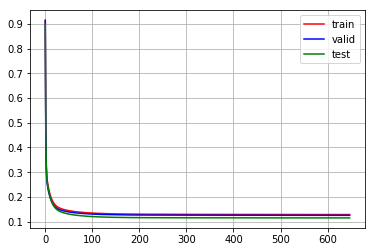

In [8]:
print("sgd train error "+str(stepnet.train_errors.last()))
print("sgd test error "+str(test_errors[len(test_errors)-1]))
plt.clf()
plt.grid(True)
plt.plot(stepnet.train_errors, color='r', label='train') 
plt.plot(stepnet.validation_errors, color='b', label='valid') 
plt.plot(test_errors, color='g', label='test')
plt.legend()
plt.savefig('SGD_train_valid_test.png', bbox_inches='tight')
nets["sgd"]=stepnet.last_epoch

In [9]:

test_errors=[]
fletchernet = algorithms.ConjugateGradient(
     connection=[
         layers.Input(2),
         layers.Tanh(10, weight=copy.deepcopy(weight1), bias=copy.deepcopy(bias1)),
         layers.Tanh(10, weight=copy.deepcopy(weight2), bias=copy.deepcopy(bias2)),
         layers.Tanh(5, weight=copy.deepcopy(weight3), bias=copy.deepcopy(bias3)),
         layers.Linear(1, weight=copy.deepcopy(weight4), bias=copy.deepcopy(bias4)),
     ],
     search_method='golden',
     update_function='fletcher_reeves',
     error='mse',
     shuffle_data=False,
     addons=[algorithms.LinearSearch],
     step=0.01,
     verbose=True,
     epoch_end_signal=signal,
     show_epoch=50
 )




Main information

[ALGORITHM] ConjugateGradient

[OPTION] verbose = True
[OPTION] epoch_end_signal = signal
[OPTION] show_epoch = 50
[OPTION] shuffle_data = False
[OPTION] step = 0.01
[OPTION] train_end_signal = None
[OPTION] error = mse
[OPTION] addons = ['LinearSearch']
[OPTION] update_function = fletcher_reeves
[OPTION] maxiter = 10
[OPTION] search_method = golden
[OPTION] tol = 0.1

[THEANO] Initializing Theano variables and functions.
[THEANO] Initialization finished successfully. It took 1.38 seconds


In [10]:
fletchernet.train(learn_params, learn_target, validation_params, validation_target, epochs=number_of_epochs)


Start training

[TRAINING DATA] shapes: (4665, 2)
[TEST DATA] shapes: (2332, 2)
[TRAINING] Total epochs: 1000

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |      0.9151 |     0.91445 |      186 ms |
|          50 |     0.12863 |     0.12563 |      141 ms |
|         100 |     0.12751 |     0.12422 |      156 ms |
|         150 |     0.12671 |     0.12354 |      166 ms |
|         200 |     0.12569 |     0.12282 |      174 ms |
|         250 |     0.12407 |     0.12141 |      205 ms |
|         300 |     0.12355 |     0.12119 |      178 ms |
|         350 |     0.12255 |     0.12094 |      178 ms |
|         400 |      0.1221 |     0.12239 |      172 ms |
---------------------------------------------------------
[TRAIN] Epoch #424 stopped. Training has been interrupted
|         424 |     0.12167 |     0.12123 |      162 ms |



fletcher train error 0.12166561429181127
fletcher test error 0.1128994318170728


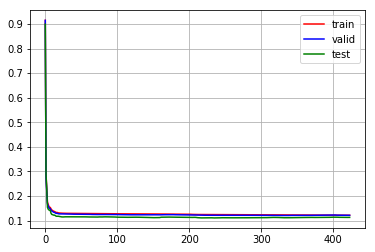

In [11]:
print("fletcher train error "+str(fletchernet.train_errors.last()))
print("fletcher test error "+str(test_errors[len(test_errors)-1]))
plt.clf()
plt.grid(True)
plt.plot(fletchernet.train_errors, color='r', label='train') 
plt.plot(fletchernet.validation_errors, color='b', label='valid') 
plt.plot(test_errors, color='g', label='test')
plt.legend()
plt.savefig('Fletcher_train_valid_test.png', bbox_inches='tight')
nets["fletcher"]=fletchernet.last_epoch

In [14]:
test_errors=[]
polaknet = algorithms.ConjugateGradient(
     connection=[
         layers.Input(2),
         layers.Tanh(10, weight=copy.deepcopy(weight1), bias=copy.deepcopy(bias1)),
         layers.Tanh(10, weight=copy.deepcopy(weight2), bias=copy.deepcopy(bias2)),
         layers.Tanh(5, weight=copy.deepcopy(weight3), bias=copy.deepcopy(bias3)),
         layers.Linear(1, weight=copy.deepcopy(weight4), bias=copy.deepcopy(bias4)),
     ],
     search_method='golden',
     update_function='polak_ribiere',
     error='mse',
     shuffle_data=False,
     addons=[algorithms.LinearSearch],
     verbose=True,
     epoch_end_signal=signal,
     show_epoch=50
 )


Main information

[ALGORITHM] ConjugateGradient

[OPTION] verbose = True
[OPTION] epoch_end_signal = signal
[OPTION] show_epoch = 50
[OPTION] shuffle_data = False
[OPTION] step = 0.1
[OPTION] train_end_signal = None
[OPTION] error = mse
[OPTION] addons = ['LinearSearch']
[OPTION] update_function = polak_ribiere
[OPTION] maxiter = 10
[OPTION] search_method = golden
[OPTION] tol = 0.1

[THEANO] Initializing Theano variables and functions.
[THEANO] Initialization finished successfully. It took 0.45 seconds


In [15]:
polaknet.train(learn_params, learn_target, validation_params, validation_target, epochs=number_of_epochs)


Start training

[TRAINING DATA] shapes: (4665, 2)
[TEST DATA] shapes: (2332, 2)
[TRAINING] Total epochs: 1000

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |      0.9151 |     0.91445 |      170 ms |
|          50 |     0.12864 |     0.12568 |      147 ms |
|         100 |     0.12753 |      0.1242 |      143 ms |
|         150 |     0.12597 |     0.12317 |      295 ms |
|         200 |     0.12393 |     0.12127 |      126 ms |
---------------------------------------------------------
[TRAIN] Epoch #204 stopped. Training has been interrupted
|         204 |      0.1239 |     0.12121 |      172 ms |



polak train error 0.12390340678317362
polak test error 0.11117425612196366


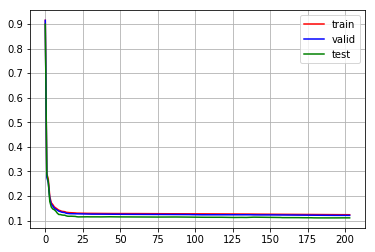

In [16]:
print("polak train error "+str(polaknet.train_errors.last()))
print("polak test error "+str(test_errors[len(test_errors)-1]))
plt.clf()
plt.grid(True)
plt.plot(polaknet.train_errors, color='r', label='train') 
plt.plot(polaknet.validation_errors, color='b', label='valid') 
plt.plot(test_errors, color='g', label='test')
plt.legend()
plt.savefig('Polak_train_valid_test.png', bbox_inches='tight')
nets["polak"]=polaknet.last_epoch

In [17]:
test_errors=[]
bfgsnet = algorithms.QuasiNewton(
     connection=[
         layers.Input(2),
         layers.Tanh(10, weight=copy.deepcopy(weight1), bias=copy.deepcopy(bias1)),
         layers.Tanh(10, weight=copy.deepcopy(weight2), bias=copy.deepcopy(bias2)),
         layers.Tanh(5, weight=copy.deepcopy(weight3), bias=copy.deepcopy(bias3)),
         layers.Linear(1, weight=copy.deepcopy(weight4), bias=copy.deepcopy(bias4)),
     ],
     update_function='bfgs',
     error='mse',
     h0_scale=1,
     epoch_end_signal=signal,
     shuffle_data=True,
     show_epoch=50,
     verbose=True
 )


Main information

[ALGORITHM] QuasiNewton

[OPTION] verbose = True
[OPTION] epoch_end_signal = signal
[OPTION] show_epoch = 50
[OPTION] shuffle_data = True
[OPTION] train_end_signal = None
[OPTION] error = mse
[OPTION] addons = None
[OPTION] h0_scale = 1
[OPTION] update_function = bfgs

[THEANO] Initializing Theano variables and functions.
[THEANO] Initialization finished successfully. It took 20.68 seconds


In [18]:
bfgsnet.train(learn_params, learn_target, validation_params, validation_target, epochs=number_of_epochs)


Start training

[TRAINING DATA] shapes: (4665, 2)
[TEST DATA] shapes: (2332, 2)
[TRAINING] Total epochs: 1000

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |      2.3394 |     0.91329 |      125 ms |
|          50 |     0.12634 |     0.12319 |       37 ms |
|         100 |     0.12296 |     0.12188 |       19 ms |
|         150 |     0.12131 |     0.12097 |       19 ms |
|         200 |     0.12064 |     0.12098 |       19 ms |
|         250 |     0.11996 |     0.12009 |       19 ms |
|         300 |     0.11888 |     0.12024 |       20 ms |
|         350 |     0.11743 |      0.1195 |       19 ms |
|         400 |     0.11644 |     0.11785 |       19 ms |
|         450 |     0.11576 |     0.11749 |       19 ms |
|         500 |     0.11497 |      0.1173 |       20 ms |
|         550 |      0.1142 |     0.11692 |       39 ms |
|         600 |   

bfgs train error 0.11163552001785139
bfgs test error 0.10796945472539146


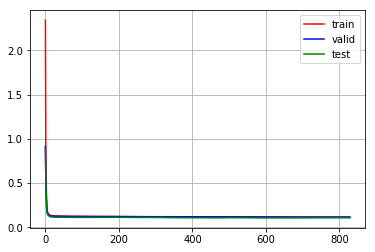

In [19]:
print("bfgs train error "+str(bfgsnet.train_errors.last()))
print("bfgs test error "+str(test_errors[len(test_errors)-1]))
plt.clf()
plt.grid(True)
plt.plot(bfgsnet.train_errors, color='r', label='train') 
plt.plot(bfgsnet.validation_errors, color='b', label='valid') 
plt.plot(test_errors, color='g', label='test')
plt.legend()
plt.savefig('Bfgs_train_valid_test.png', bbox_inches='tight')
nets["bfgs"]=bfgsnet.last_epoch

In [20]:
test_errors=[]
lmnet = algorithms.LevenbergMarquardt(
     connection=[
         layers.Input(2),
         layers.Tanh(10, weight=copy.deepcopy(weight1), bias=copy.deepcopy(bias1)),
         layers.Tanh(10, weight=copy.deepcopy(weight2), bias=copy.deepcopy(bias2)),
         layers.Tanh(5, weight=copy.deepcopy(weight3), bias=copy.deepcopy(bias3)),
         layers.Linear(1, weight=copy.deepcopy(weight4), bias=copy.deepcopy(bias4)),
     ],
     epoch_end_signal=signal,
     shuffle_data=True,
     mu=0.5,
     mu_update_factor=1.3,
     show_epoch=50,
     verbose=True
 )


Main information

[ALGORITHM] LevenbergMarquardt

[OPTION] verbose = True
[OPTION] epoch_end_signal = signal
[OPTION] show_epoch = 50
[OPTION] shuffle_data = True
[OPTION] train_end_signal = None
[OPTION] addons = None
[OPTION] error = mse
[OPTION] mu = 0.5
[OPTION] mu_update_factor = 1.3

[THEANO] Initializing Theano variables and functions.
[THEANO] Initialization finished successfully. It took 2.00 seconds


In [21]:
lmnet.train(learn_params, learn_target, validation_params, validation_target, epochs=number_of_epochs)


Start training

[TRAINING DATA] shapes: (4665, 2)
[TEST DATA] shapes: (2332, 2)
[TRAINING] Total epochs: 1000

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |      2.3394 |      2.1841 |       3 sec |
|          50 |      1.0305 |     0.85365 |       3 sec |
|         100 |     0.77509 |     0.78293 |       3 sec |
|         150 |     0.57757 |     0.57832 |       4 sec |
|         200 |     0.49557 |     0.40668 |       3 sec |
---------------------------------------------------------
[TRAIN] Epoch #245 stopped. Training has been interrupted
|         245 |     0.40033 |     0.38509 |       3 sec |



lm train error 0.4003332293314025
lm test error 0.3904395966606572


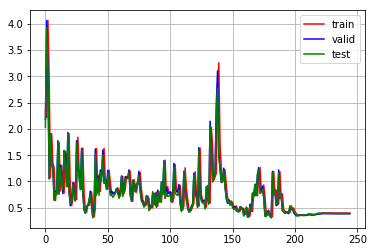

In [22]:
print("lm train error "+str(lmnet.train_errors.last()))
print("lm test error "+str(test_errors[len(test_errors)-1]))
plt.clf()
plt.grid(True)
plt.plot(lmnet.train_errors, color='r', label='train') 
plt.plot(lmnet.validation_errors, color='b', label='valid') 
plt.plot(test_errors, color='g', label='test')
plt.legend()
plt.savefig('LM_train_valid_test.png', bbox_inches='tight')
nets["lm"]=lmnet.last_epoch

In [23]:
#nets=pd.DataFrame(nets)
#nets=np.array(nets)
#nets=pd.DataFrame(nets)
#nets.to_csv("../nets.csv")